In [21]:
import numpy as np
from despotic import cloud
import matplotlib
import matplotlib.pyplot as plt


In [3]:
data = cloud(fileName='/Users/sidneylower/despotic/cloudfiles/MilkyWayGMC.desp')
model = cloud(fileName='/Users/sidneylower/despotic/cloudfiles/MilkyWayGMC.desp')

In [4]:
lines = data.lineLum("co")[0:3]

/anaconda3/lib/python3.6/site-packages/despotic/radiation.py:107: RuntimeWarning: divide by zero encountered in true_divide
  expfacdust = np.exp(-Tnu/self.TradDust)
/anaconda3/lib/python3.6/site-packages/despotic/emitter.py:840: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.levPop, res, rank, s = np.linalg.lstsq(m, b)


In [5]:
lines

[{'freq': 115271201800.0,
  'upper': 1,
  'lower': 0,
  'Tupper': 5.532146999335308,
  'Tex': 7.699686449262714,
  'lumPerH': 7.514329448816554e-29,
  'intIntensity': 8.969261254757721e-08,
  'intTB': 57.14039614448615,
  'tau': 57.32675463874731,
  'tauDust': 9.181395127068287e-05},
 {'freq': 230538000000.0,
  'upper': 2,
  'lower': 1,
  'Tupper': 16.59618158501025,
  'Tex': 7.258956772219919,
  'lumPerH': 3.965467665008809e-28,
  'intIntensity': 4.7327765767021983e-07,
  'intTB': 37.69098642837029,
  'tau': 85.24823874347138,
  'tauDust': 0.00036724177528003627},
 {'freq': 345795989900.0,
  'upper': 3,
  'lower': 2,
  'Tupper': 33.19189236322334,
  'Tex': 5.678403516742282,
  'lumPerH': 4.057243316539865e-28,
  'intIntensity': 4.841477382798666e-07,
  'intTB': 11.425291900493349,
  'tau': 33.66947927727506,
  'tauDust': 0.0008262413787032487}]

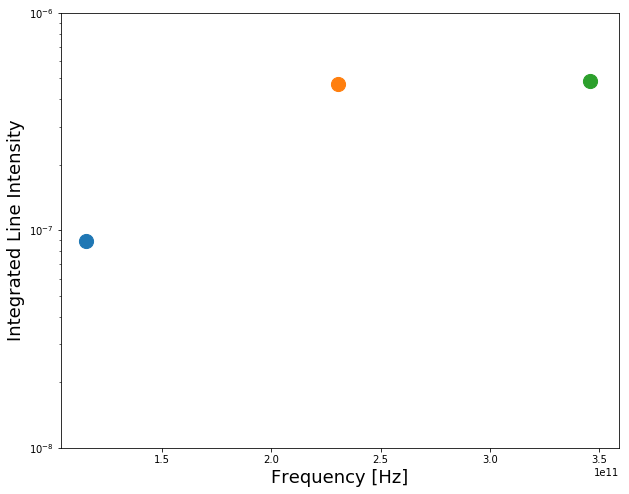

In [6]:
plt.figure(figsize=(10, 8))
for i in range(len(lines)):
    #plt.figure(figsize=(10, 8))
    plt.scatter(lines[i]['freq'], lines[i]['intIntensity'], s=200)
    plt.yscale('log')
    plt.ylim([1e-8, 1e-6])
    plt.ylabel('Integrated Line Intensity', fontsize=18)
    plt.xlabel('Frequency [Hz]', fontsize=18)
    #plt.xscale('log')

In [7]:
Tg_grid = np.arange(5, 100, 1) #K
density_grid = np.arange(10, 1000, 10) #cm^-3

In [8]:
model_intensities1 = np.empty([len(Tg_grid), len(density_grid)])
model_intensities2 = np.empty([len(Tg_grid), len(density_grid)])
model_intensities3 = np.empty([len(Tg_grid), len(density_grid)])
for i in range(len(Tg_grid)):
    for j in range(len(density_grid)):
        model.Tg = Tg_grid[i]
        model.nH = density_grid[j]
        model_intensities1[i, j] = model.lineLum("co")[0]['intIntensity']
        model_intensities2[i, j] = model.lineLum("co")[1]['intIntensity']
        model_intensities3[i, j] = model.lineLum("co")[2]['intIntensity']

/anaconda3/lib/python3.6/site-packages/despotic/radiation.py:107: RuntimeWarning: divide by zero encountered in true_divide
  expfacdust = np.exp(-Tnu/self.TradDust)
/anaconda3/lib/python3.6/site-packages/despotic/emitter.py:840: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.levPop, res, rank, s = np.linalg.lstsq(m, b)


In [9]:
res1 = np.empty([len(Tg_grid), len(density_grid)])
res2 = np.empty([len(Tg_grid), len(density_grid)])
res3 = np.empty([len(Tg_grid), len(density_grid)]) 
for i in range(len(Tg_grid)):
    for j in range(len(density_grid)):
        res1[i, j] = np.abs(model_intensities1[i, j] - data.lineLum("co")[0]['intIntensity']) / data.lineLum("co")[0]['intIntensity']
        res2[i, j] = np.abs(model_intensities2[i, j] - data.lineLum("co")[1]['intIntensity']) / data.lineLum("co")[1]['intIntensity']
        res3[i, j] = np.abs(model_intensities3[i, j] - data.lineLum("co")[2]['intIntensity']) / data.lineLum("co")[2]['intIntensity']

/anaconda3/lib/python3.6/site-packages/despotic/radiation.py:107: RuntimeWarning: divide by zero encountered in true_divide
  expfacdust = np.exp(-Tnu/self.TradDust)
/anaconda3/lib/python3.6/site-packages/despotic/emitter.py:840: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.levPop, res, rank, s = np.linalg.lstsq(m, b)


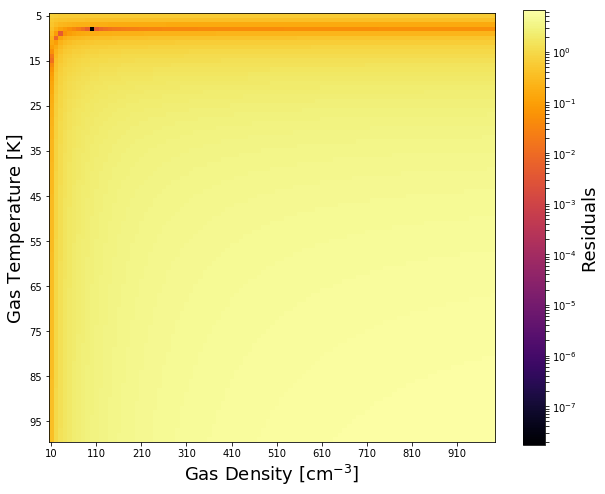

In [58]:
plt.figure(figsize=(10, 8))
plt.imshow(res1, cmap='inferno', vmin = np.min(np.ravel(res1)), vmax=np.max(np.ravel(res1)), norm=matplotlib.colors.LogNorm())
plt.xticks(np.arange(np.shape(res1)[1])[::10], np.arange(10, 1000, 10)[::10])
plt.yticks(np.arange(np.shape(res1)[0])[::10], np.arange(5, 100, 1)[::10])
plt.ylabel('Gas Temperature [K]', fontsize=18)
plt.xlabel('Gas Density [cm$^{-3}$]', fontsize=18)
cbar = plt.colorbar()
cbar.set_label('Residuals', fontsize=18)

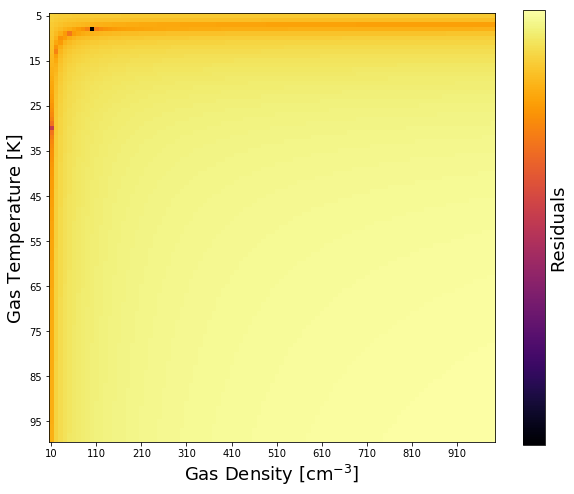

In [61]:
plt.figure(figsize=(10, 8))
plt.imshow(res2, cmap='inferno', vmin = np.min(np.ravel(res2)), vmax=np.max(np.ravel(res2)), norm=matplotlib.colors.LogNorm())
plt.xticks(np.arange(np.shape(res2)[1])[::10], np.arange(10, 1000, 10)[::10])
plt.yticks(np.arange(np.shape(res2)[0])[::10], np.arange(5, 100, 1)[::10])
plt.ylabel('Gas Temperature [K]', fontsize=18)
plt.xlabel('Gas Density [cm$^{-3}$]', fontsize=18)
cbar = plt.colorbar()
cbar.set_label('Residuals', fontsize=18)

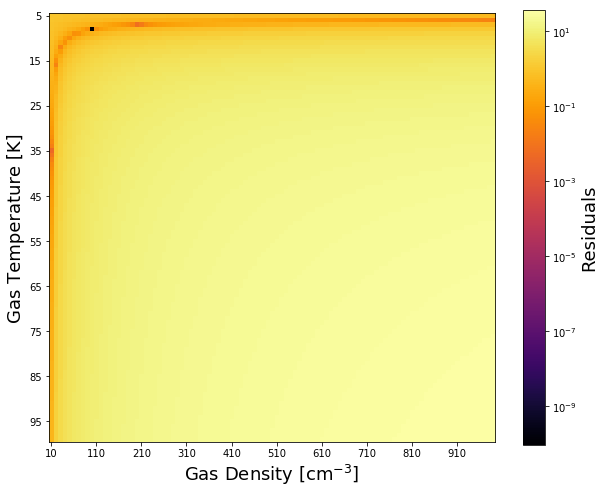

In [60]:
plt.figure(figsize=(10, 8))
plt.imshow(res3, cmap='inferno', vmin = np.min(np.ravel(res3)), vmax=np.max(np.ravel(res3)), norm=matplotlib.colors.LogNorm())
plt.xticks(np.arange(np.shape(res3)[1])[::10], np.arange(10, 1000, 10)[::10])
plt.yticks(np.arange(np.shape(res3)[0])[::10], np.arange(5, 100, 1)[::10])
plt.ylabel('Gas Temperature [K]', fontsize=18)
plt.xlabel('Gas Density [cm$^{-3}$]', fontsize=18)
cbar = plt.colorbar()
cbar.set_label('Residuals', fontsize=18)

In [62]:
co10_bestfit = np.where(res1 == np.min(res1))
co21_bestfit = np.where(res2 == np.min(res2))
co32_bestfit = np.where(res3 == np.min(res3))

print(co10_bestfit, co21_bestfit, co32_bestfit)

(array([3]), array([9])) (array([3]), array([9])) (array([3]), array([9]))


In [63]:
print("Best fit parameters:\nGas Temperature =",Tg_grid[3],"K\nGas Density =",density_grid[9], "cm^-3"
     "\n\nActual GMC parameters:\nGas Temperature =",data.Tg,"K\nGas Density =",data.nH,"cm^-3")

Best fit parameters:
Gas Temperature = 8 K
Gas Density = 100 cm^-3

Actual GMC parameters:
Gas Temperature = 8.0 K
Gas Density = 100.0 cm^-3
